In [ ]:
## DA of top sales handheld video-game console games
##Note: This DB is for handheld consoles, not platforms, so platforms such as Iphon or Android will not appear in this research

## What does the project include:
## Initially, I conducted analyses comparing copy sales versus the production of various games across different data points (platforms, publishing companies).
## Analysis of copy sales trends over the years.
## Analyses of preferences across different markets worldwide.
## Analysis of the top 20 most successful games and trends that can be learned from them.
## Finally, I selected a specific genre and analyzed it based on various parameters.

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import pandasql as pds



       ##columns legend:

## Rank - Ranking of overall sales

## Name - The game's name

## Platform - Platform of the games release (i.e. GB,GBA, etc.)

## Year - Year of the game's release

## Genre - Genre of the game 

## Publisher - Publisher of the game

## NA_Sales - Sales in North America (in millions)

## EU_Sales - Sales in Europe (in millions)

## JP_Sales - Sales in Japan (in millions)

## Other_Sales - Sales in the rest of the world (in millions)

## Global_Sales - Total worldwide sales (in millions)

In [2]:
## Importing the DB

df=pd.read_csv('C:\\Users\\Acer\\Downloads\\python\\handheld2a.csv')

In [3]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
1,2,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3,4,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
4,5,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
...,...,...,...,...,...,...,...,...,...,...,...
5688,5689,Plushees,DS,2008,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01
5689,5690,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
5690,5691,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
5691,5692,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
## I want to check the status of the missing data in the database."
df.isna().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       30
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [5]:
## Since there is less than one percent of rows with 'null', I removed them from the df
df.dropna()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
1,2,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3,4,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
4,5,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
...,...,...,...,...,...,...,...,...,...,...,...
5688,5689,Plushees,DS,2008,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01
5689,5690,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
5690,5691,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
5691,5692,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5693 entries, 0 to 5692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          5693 non-null   int64  
 1   Name          5693 non-null   object 
 2   Platform      5693 non-null   object 
 3   Year          5693 non-null   int64  
 4   Genre         5693 non-null   object 
 5   Publisher     5663 non-null   object 
 6   NA_Sales      5693 non-null   float64
 7   EU_Sales      5693 non-null   float64
 8   JP_Sales      5693 non-null   float64
 9   Other_Sales   5693 non-null   float64
 10  Global_Sales  5693 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 489.4+ KB


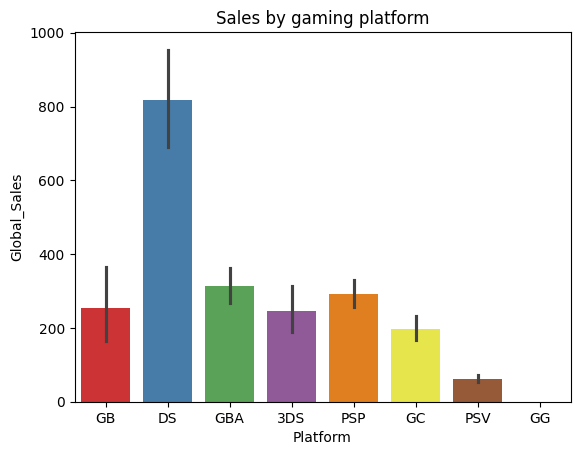

In [15]:
## I want to see how many game copies sold by platforms
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sb.barplot(x='Platform',y='Global_Sales',data=df,palette='Set1',estimator=sum)
plt.title("Sales by gaming platform")
plt.show()

In [ ]:
## This graph shows that the DS is the best-selling platform of game copies sold

In [6]:
## I want to see the relative percentage of games created for different platforms.
platform_count=df['Platform'].value_counts()

In [7]:
platform_count_idx=platform_count.reset_index()

In [8]:
platform_count_idx

,Platform,count
0,DS,2133
1,PSP,1197
2,GBA,811
3,GC,542
4,3DS,500
5,PSV,412
6,GB,97
7,GG,1


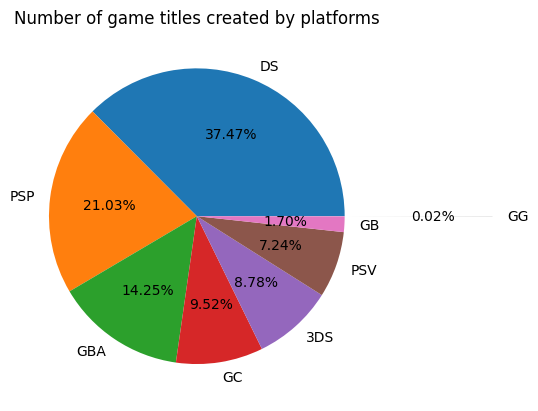

In [9]:
## I moved "GG" out, to make the chart more aesthetic
plt.pie(data=platform_count_idx,x='count',labels='Platform',autopct='%.2f%%',explode=(0,0,0,0,0,0,0,1))
plt.title("Number of game titles created by platforms")
plt.show()

In [ ]:
## From this chart we can learn that The DS has the most handheld game titles

## Note: In the fisrt graph we see that the DS also sold the most game copies in hanedheld video-games history 
## We can assert that the DS is the dominant handheld video game console, in terms of sales

In [14]:
## I want to check the five publishers who have published the most games and then the publishers who have sold the most games, 
## And see the correlation between them.

## The first graph shows the five publishers that created the most games.

top_publisher = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(5)
top_publisher = pd.DataFrame(top_publisher).reset_index()
# top_publisher

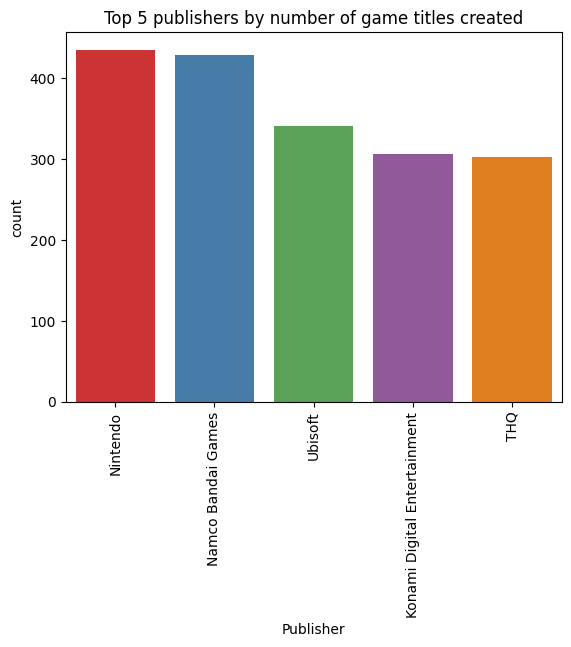

In [82]:
sb.countplot(x="Publisher", data=df, order = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:5].index,palette='Set1')
plt.xticks(rotation=90)
plt.title("Top 5 publishers by number of game titles created")
plt.show()

In [16]:
## The second graph shows the five publishers who sold the most copies of games, along with the number of copies they sold.
sale_pbl = df[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

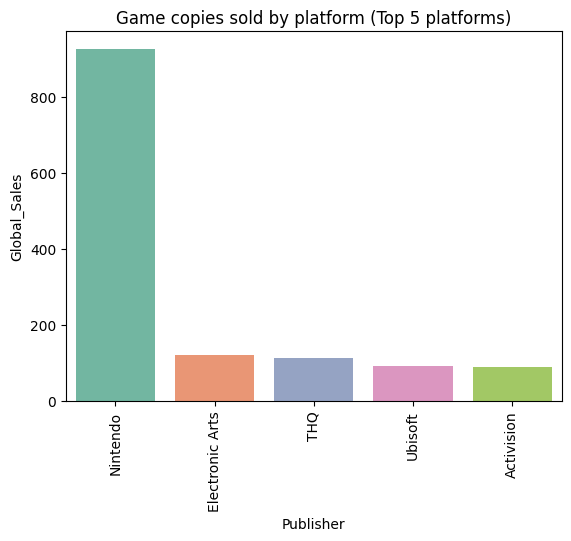

In [81]:
sb.barplot(x='Publisher', y='Global_Sales', data=sale_pbl,palette='Set2',estimator=sum)
plt.xticks(rotation=90)
plt.title("Game copies sold by platform (Top 5 platforms)")
plt.show()

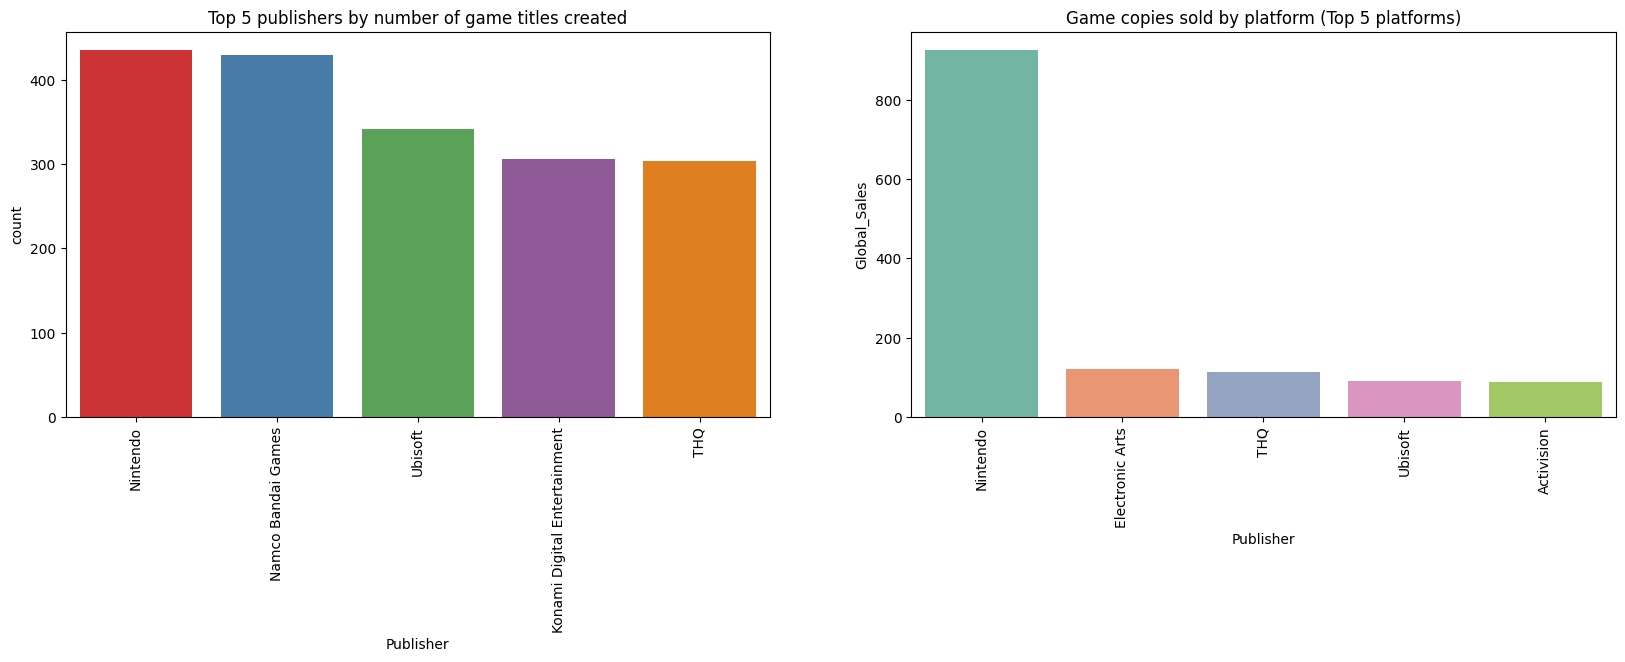

In [75]:
## Now, I will compare them side by side.
## I created displays both separately and in comparison so that on one hand, you can clearly see each graph individually, but also show a direct comparison between them.
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sb.countplot(x="Publisher", data=df, order = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:5].index,palette='Set1')
plt.xticks(rotation=90)
plt.title("Top 5 publishers by number of game titles created")
plt.subplot(1,2,2)
sb.barplot(x='Publisher', y='Global_Sales', data=sale_pbl,palette='Set2',estimator=sum)
plt.xticks(rotation=90)
plt.title("Game copies sold by platform (Top 5 platforms)")
plt.show()

In [ ]:
## It can be seen in the last two graphs that Nintendo is both the company that created the most game titles 
## And the company that sold the most copies.
## From these two data points, it can be concluded that historically,
## Nintendo is the most dominant company in the handheld console gaming market (based on sales and game variety).

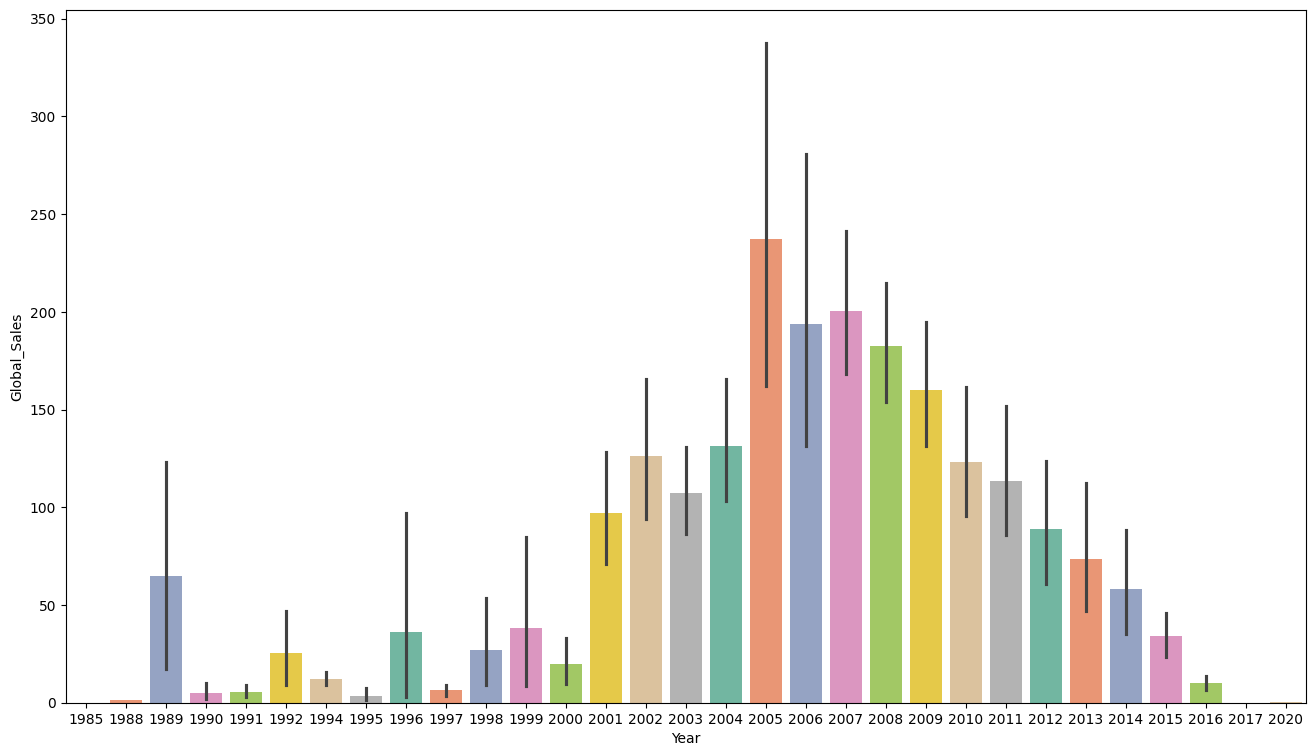

In [18]:
## I want to see if there is a trend in the years of game copy sales.
plt.figure(figsize=(16,9))
sb.barplot(x='Year',y='Global_Sales',data=df,palette='Set2',estimator=sum)
plt.show()

In [13]:
## From the graph, it can be seen that since 2001, there has been the most significant upward trend in sales until 2005.
## Since 2008, a gradual decline in sales began, continuing until 2016, which was the last year to show a significant sales column.
## It can be concluded from this graph that from the early 2000s until the middle of the second decade of the 2000s, it was the most profitable period for handheld video game consoles.

In [19]:
## I am moving on to table analysis, so I am presenting the main table again for convenience.
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
1,2,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3,4,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
4,5,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
...,...,...,...,...,...,...,...,...,...,...,...
5688,5689,Plushees,DS,2008,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01
5689,5690,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
5690,5691,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
5691,5692,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [109]:
## I want to examine the genre preferences of games in each market and see what can be learned from this analysis.
genre_df=pds.sqldf(""" select Genre,sum(NA_Sales) as "North America(M)",sum(EU_Sales)AS "EU(M)",sum(JP_Sales) AS "Japan(M)",sum(Other_Sales) AS "Other_Markets(M)",sum(Global_Sales) as "Global(M)" 
from df group by Genre order by sum(Global_Sales) desc;""",globals())

In [110]:
genre_df

,Genre,North America(M),EU(M),Japan(M),Other_Markets(M),Global(M)
0,Role-Playing,146.75,73.68,190.24,19.02,429.85
1,Action,178.80,85.78,59.93,27.89,352.90
2,Platform,154.55,70.26,47.97,17.60,290.62
3,Misc,104.40,54.42,60.80,13.25,233.08
4,Simulation,86.17,49.70,32.35,14.41,182.65
5,Puzzle,78.72,38.05,33.09,8.92,159.29
6,Racing,71.50,38.65,12.32,13.28,135.81
7,Sports,66.81,33.11,22.04,10.46,132.62
8,Adventure,48.72,20.92,26.79,5.63,102.13
9,Fighting,31.10,11.72,17.53,4.95,65.33


In [ ]:
## The main insight that can be drawn from this table is that the Japanese market
## Has very different genre preferences, for handheld console games, compared to the rest of the world.

In [117]:
## I want to examine the trend in game sales, across different consoles, according to various markets around the world.

platform_df=pds.sqldf(""" select Platform,sum(NA_Sales) as "North_America(M)",sum(EU_Sales)AS "EU(M)",sum(JP_Sales) AS "Japan(M)",sum(Other_Sales) AS "Other_Markets(M)",sum(Global_Sales) as "Global(M)" 
from df group by Platform order by sum(Global_Sales) desc;""",globals())

In [118]:
platform_df

,Platform,North_America(M),EU(M),Japan(M),Other_Markets(M),Global(M)
0,DS,388.56,194.07,175.02,60.29,818.96
1,GBA,184.12,74.59,46.56,7.61,313.56
2,PSP,107.09,67.16,75.89,41.52,291.71
3,GB,113.64,47.51,85.12,8.16,254.42
4,3DS,78.03,58.30,97.30,12.55,246.28
5,GC,131.94,38.32,21.34,5.13,197.14
6,PSV,16.07,16.27,20.89,8.41,61.63
7,GG,0.00,0.00,0.04,0.00,0.04


In [ ]:
## From the analysis of this table, it can be argued that, aside from the first and last positions, 
## There is no direct correlation between the markets regarding sales, and there was no clear trend among the markets.
## What can mainly be learned from this table (which is why I kept it) 
## Is that the top position in console sales is also the top position in title creation.
## First place  both in copies sold and in copies created is the DS.

In [143]:
## I want to examine if there is a specific trend that can be learned from the list of the 20 best-selling games.
top_20 = df.nsmallest(20, 'Rank')

In [163]:
top_20

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
1,2,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3,4,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
4,5,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
5,6,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
6,7,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
7,8,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
8,9,Super Mario Land,GB,1989,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
9,10,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85


In [161]:
## I noticed a high number of Pokémon games, so I want to check how many of them appear in the top 20 best-selling games.

pokemon_20=top_20.query('Name.str.contains("Pokemon")')

In [162]:
pokemon_20

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
7,8,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
9,10,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
10,11,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
13,14,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
16,17,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
17,18,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33


In [ ]:
## From the table above, it can be seen that the best-selling game in the history of video game consoles and handhelds
## And about 40% of the top 20 best-selling games in this category are Pokémon games.
## It can be concluded that Pokémon games play a significant role in the history of the handheld video game console industry.


In [28]:
## I want to examine which genre created the most titles and then analyze it.

ge_df=pds.sqldf(""" select Genre,count(*) from df group by Genre order by count(*) desc;""",globals())

In [29]:
ge_df

,Genre,count(*)
0,Action,1141
1,Misc,723
2,Role-Playing,673
3,Adventure,635
4,Sports,527
5,Platform,395
6,Simulation,375
7,Puzzle,369
8,Racing,278
9,Fighting,204


In [ ]:
## According to the table above, we learn that action games are the genre with the most titles created.

## Note: In the table of "copies sold by genre", we see that in all markets (except for the Japanese market),
## action games are the genre that sold the most copies.
## This data could explain the preference for producing games from this genre.


In [33]:
##  Since action games are the genre that has produced the most titles,
##  And they are the most popular (except in the Japanese market), 
##  I want to examine what trends can be learned from them.

##  First, I will create a table of action games only.

action_df=pds.sqldf(""" select * from df where Genre='Action';""",globals())

In [34]:
action_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,17,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
1,28,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72
2,47,The Legend of Zelda: Phantom Hourglass,DS,2007,Action,Nintendo,1.90,1.83,0.95,0.49,5.17
3,51,Grand Theft Auto: Vice City Stories,PSP,2006,Action,Take-Two Interactive,1.70,2.02,0.16,1.21,5.08
4,54,LEGO Star Wars: The Complete Saga,DS,2007,Action,LucasArts,2.89,1.54,0.00,0.46,4.90
...,...,...,...,...,...,...,...,...,...,...,...
1136,5670,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01
1137,5675,Original Frisbee Disc Sports: Ultimate & Golf,DS,2007,Action,"Destination Software, Inc",0.01,0.00,0.00,0.00,0.01
1138,5677,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
1139,5682,Planet Monsters,GBA,2001,Action,Titus,0.01,0.00,0.00,0.00,0.01


In [35]:
## I want to see which company published most action game titles.

action_df_var=pds.sqldf(""" select Publisher,count(*)
from best_df group by Publisher order by count(*) desc;""",globals())

In [36]:
action_df_var

,Publisher,count(*)
0,Namco Bandai Games,134
1,Activision,93
2,THQ,81
3,Ubisoft,57
4,Konami Digital Entertainment,55
...,...,...
123,ChunSoft,1
124,Blast! Entertainment Ltd,1
125,Banpresto,1
126,Aksys Games,1


In [ ]:
## From the last table, we learn that Bandai Namco is the company that has produced the most action game titles
## In the handheld video game console market.

In [119]:
## I want to see which company sold the most copies of action games.

action_df_sales=pds.sqldf(""" select Publisher,sum(NA_Sales) as "North America(M)",sum(EU_Sales)AS "EU(M)",sum(JP_Sales) AS "Japan(M)",sum(Other_Sales) AS "Other_Markets(M)",sum(Global_Sales) as "Global(M)"  
from best_df group by Publisher order by sum(Global_Sales) desc;""",globals())

In [120]:
action_df_sales

,Publisher,North America(M),EU(M),Japan(M),Other_Markets(M),Global(M)
0,Nintendo,31.52,16.28,15.34,3.66,66.78
1,Activision,23.29,8.10,0.14,2.82,34.34
2,THQ,22.33,7.83,0.08,1.65,31.99
3,Electronic Arts,11.61,7.27,0.31,1.83,21.04
4,Warner Bros. Interactive Entertainment,10.24,7.78,0.17,2.47,20.75
...,...,...,...,...,...,...
123,Storm City Games,0.01,0.00,0.00,0.00,0.01
124,NetRevo,0.00,0.00,0.01,0.00,0.01
125,Inti Creates,0.00,0.00,0.01,0.00,0.01
126,HuneX,0.00,0.00,0.01,0.00,0.01


In [ ]:
## From the last table, we can learn that while the previous table showed that Bandai Namco produced the most action game titles,
## Nintendo (which didn’t even appear in the top five companies that produced the most action game titles) 
## Is the company that sold the most copies of action games for handheld consoles.
## It can be seen from the analysis of action games, combined with the previous analyses,
## The dominance of Nintendo in the field of sales of handheld console game copies.